In [29]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
## loading the data
data=pd.read_csv('loan_approved.csv')

In [31]:
## Getting the first few rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [33]:
# head,tail,info,describe for both numerical and categorical
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [34]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [35]:
print(f"{data.columns[0]} is not so used")
print(f"{data.columns[1]} is Nominal")
print(f"{data.columns[2]} is Nominal")
print(f"{data.columns[3]} is Ordinal")
print(f"{data.columns[4]} is Nominal")
print(f"{data.columns[5]} is Nominal")
print(f"{data.columns[6]} is Discrete")
print(f"{data.columns[7]} is Continuous")
print(f"{data.columns[8]} is Continuous")
print(f"{data.columns[9]} is Continuous")
print(f"{data.columns[10]} is Nominal")
print(f"{data.columns[11]} is Nominal")

Loan_ID is not so used
Gender is Nominal
Married is Nominal
Dependents is Ordinal
Education is Nominal
Self_Employed is Nominal
ApplicantIncome is Discrete
CoapplicantIncome is Continuous
LoanAmount is Continuous
Loan_Amount_Term is Continuous
Credit_History is Nominal
Property_Area is Nominal


In [36]:
# fill the missing values with central tendancy

for i in data.columns:    
    if data[i].dtype in ['int64','float64']:      
        if data[i].isnull().sum() > 0:      
            data[i] = data[i].fillna(data[i].median())
    else:                                         
        if data[i].isnull().sum() > 0:
            data[i] = data[i].fillna(data[i].mode()[0])

data.isnull().sum()



Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

# Outlier Detection

In [37]:
mean_data = data['ApplicantIncome'].mean()
data['ApplicantIncome'].fillna(mean_data, inplace=True)

sd = data['ApplicantIncome'].std()

print("Standard Deviation is:", sd)
print("Mean is:", mean_data)

z1 = (5849 - mean_data)/ sd
print("Z-score is:", z1)

Standard Deviation is: 6109.041673387174
Mean is: 5403.459283387622
Z-score is: 0.07293135984867927


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5480\3545690776.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ApplicantIncome'].fillna(mean_data, inplace=True)


In [38]:
# Loan Amount
print("Skewness of Loan Amount: ", data['LoanAmount'].skew())
print("Kurtosis of Loan Amount: ", data['LoanAmount'].kurt())
print("Skewness of Applicant Income not acceptable as highly skewed")
print("Applicant Income is leptokurtic as kurtosis >3")

Skewness of Loan Amount:  2.743052748820892
Kurtosis of Loan Amount:  10.936694906900337
Skewness of Applicant Income not acceptable as highly skewed
Applicant Income is leptokurtic as kurtosis >3


In [39]:
# CoApplicant Income
print("Skewness of CoApplicant Income: ", data['CoapplicantIncome'].skew())
print("Kurtosis of CoApplicant Income: ", data['CoapplicantIncome'].kurt())
print("Skewness of Applicant Income not acceptable as highly skewed")
print("Applicant Income is leptokurtic as kurtosis >3")

Skewness of CoApplicant Income:  7.491531216657306
Kurtosis of CoApplicant Income:  84.95638421103374
Skewness of Applicant Income not acceptable as highly skewed
Applicant Income is leptokurtic as kurtosis >3


In [40]:
# Applicant Income
print("Skewness of Applicant Income: ", data['ApplicantIncome'].skew())
print("Kurtosis of Applicant Income: ", data['ApplicantIncome'].kurt())
print("Skewness of Applicant Income not acceptable as highly skewed")
print("Applicant Income is leptokurtic as kurtosis >3")
print("Applicant Income is not Normally distributed")

Skewness of Applicant Income:  6.539513113994625
Kurtosis of Applicant Income:  60.54067593369113
Skewness of Applicant Income not acceptable as highly skewed
Applicant Income is leptokurtic as kurtosis >3
Applicant Income is not Normally distributed


In [41]:
# one hot encoding
df1= pd.get_dummies(data['Gender'],prefix='Gender',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Gender'],axis=1)

In [42]:
data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,True
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,True
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,True
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,True
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,False
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,True
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,True
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,True


In [43]:

df2= pd.get_dummies(data['Married'],prefix='Married',drop_first=True)
data=pd.concat([data,df2],axis=1).drop(['Married'],axis=1)

In [44]:
data

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Gender_Male,Married_Yes
0,LP001002,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,True,False
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,True,True
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,True,True
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,True,True
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,False,False
610,LP002979,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,True,True
611,LP002983,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,True,True
612,LP002984,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,True,True


In [45]:
df3= pd.get_dummies(data['Dependents'],prefix='Dependents',drop_first=True)
data=pd.concat([data,df3],axis=1).drop(['Dependents'],axis=1)

In [46]:
data

,Loan_ID,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,True,False,False,False,False
1,LP001003,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,True,True,True,False,False
2,LP001005,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,True,True,False,False,False
3,LP001006,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,True,True,False,False,False
4,LP001008,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,False,False,False,False,False
610,LP002979,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,True,True,False,False,True
611,LP002983,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,True,True,True,False,False
612,LP002984,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,True,True,False,True,False


In [47]:
df4= pd.get_dummies(data['Property_Area'],prefix='Property_Area',drop_first=True)
data=pd.concat([data,df4],axis=1).drop(['Property_Area'],axis=1)

In [48]:
data

,Loan_ID,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Graduate,No,5849,0.0,128.0,360.0,1.0,Y,True,False,False,False,False,False,True
1,LP001003,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,True,True,True,False,False,False,False
2,LP001005,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,True,True,False,False,False,False,True
3,LP001006,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,True,True,False,False,False,False,True
4,LP001008,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,False,False,False,False,False,False,False
610,LP002979,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,True,True,False,False,True,False,False
611,LP002983,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,True,True,True,False,False,False,True
612,LP002984,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,True,True,False,True,False,False,True


In [49]:
print(len(data.columns))

16


In [50]:
df5= pd.get_dummies(data['Loan_Status (Approved)'],prefix='Loan_Status (Approved)',drop_first=True)
data=pd.concat([data,df5],axis=1).drop(['Loan_Status (Approved)'],axis=1)

In [51]:
data

,Loan_ID,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Loan_Status (Approved)_Y
0,LP001002,Graduate,No,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,False,True,True
1,LP001003,Graduate,No,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False
2,LP001005,Graduate,Yes,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,True
3,LP001006,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,False,True,True
4,LP001008,Graduate,No,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,No,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,False,True
610,LP002979,Graduate,No,4106,0.0,40.0,180.0,1.0,True,True,False,False,True,False,False,True
611,LP002983,Graduate,No,8072,240.0,253.0,360.0,1.0,True,True,True,False,False,False,True,True
612,LP002984,Graduate,No,7583,0.0,187.0,360.0,1.0,True,True,False,True,False,False,True,True


In [52]:
print(len(data.columns))

16


In [53]:
df6= pd.get_dummies(data['Self_Employed'],prefix='Self_Employed',drop_first=True)
data=pd.concat([data,df6],axis=1).drop(['Self_Employed'],axis=1)

In [54]:
data

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Loan_Status (Approved)_Y,Self_Employed_Yes
0,LP001002,Graduate,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,False,True,True,False
1,LP001003,Graduate,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False
2,LP001005,Graduate,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,True,True
3,LP001006,Not Graduate,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,False,True,True,False
4,LP001008,Graduate,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,False,True,False
610,LP002979,Graduate,4106,0.0,40.0,180.0,1.0,True,True,False,False,True,False,False,True,False
611,LP002983,Graduate,8072,240.0,253.0,360.0,1.0,True,True,True,False,False,False,True,True,False
612,LP002984,Graduate,7583,0.0,187.0,360.0,1.0,True,True,False,True,False,False,True,True,False


In [55]:
print(len(data.columns))

16


In [56]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')



In [58]:
la_shape=pt.fit_transform(data[['LoanAmount']])
la_shape.shape

(614, 1)

In [62]:
print("Skewness is: ",pd.Series(la_shape.reshape(614,)).skew())
print("Kurtosis is: ",pd.Series(la_shape.reshape(614,)).kurtosis())

Skewness is:  0.02083110923009167
Kurtosis is:  2.4535382601295623


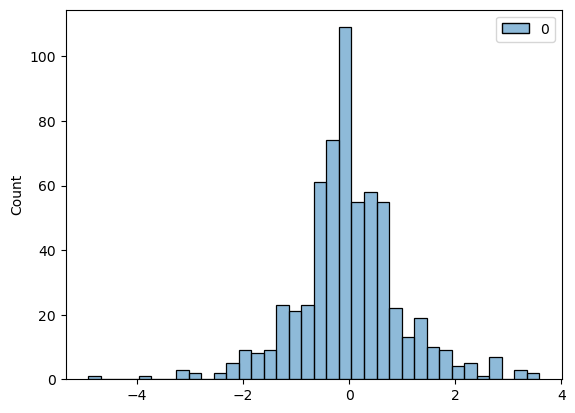

In [63]:
sns.histplot(la_shape)
plt.show()